In [1]:
import seaborn as sns
import pandas as pd


In [2]:
df_temperature = pd.read_csv("data/hh_tmp_20200101-20211021.csv", sep=';', parse_dates=[0], infer_datetime_format=True, index_col=0, decimal=',')
df_temperature

,TemperaturBillbrook,TemperaturFinkenwerder,TemperaturMarckmannstraße
Datum,,,
2020-01-01,0.6,-0.1,1.3
2020-02-01,-0.6,-0.3,-0.1
2020-03-01,5.9,5.9,6.3
2020-04-01,4.7,4.8,5.3
2020-05-01,4.1,3.9,4.7
...,...,...,...
2021-10-17,10.3,9.8,10.2
2021-10-18,11.9,11.2,11.8
2021-10-19,13.2,13.4,13.2


In [3]:
from datetime import datetime


df_covid = pd.read_csv("data/hh_covid_20200101-20211021.csv", parse_dates=[1], index_col=1, decimal=',')
df_covid

,Wochentag,InfektionenKumuliert,Infektionen7Tage,Inzidenz7Tage,Bevölkerungsstand
Datum,,,,,
2020-03-12,Do,97,NaN,NaN,1899160.0
2020-03-13,Fr,123,NaN,NaN,NaN
2020-03-14,Sa,152,NaN,NaN,NaN
2020-03-15,So,196,NaN,NaN,NaN
2020-03-16,Mo,257,NaN,NaN,NaN
...,...,...,...,...,...
2021-10-08,Fr,93053,1162.0,61.2,NaN
2021-10-09,Sa,93241,1208.0,63.6,NaN
2021-10-10,So,93309,1139.0,60.0,NaN


In [4]:
df = df_covid.join(df_temperature)
df

,Wochentag,InfektionenKumuliert,Infektionen7Tage,Inzidenz7Tage,Bevölkerungsstand,TemperaturBillbrook,TemperaturFinkenwerder,TemperaturMarckmannstraße
Datum,,,,,,,,
2020-03-12,Do,97,NaN,NaN,1899160.0,0.4,1.4,0.6
2020-03-13,Fr,123,NaN,NaN,NaN,5.7,5.5,5.6
2020-03-14,Sa,152,NaN,NaN,NaN,4.2,4.4,4.3
2020-03-15,So,196,NaN,NaN,NaN,8.8,9.7,9.3
2020-03-16,Mo,257,NaN,NaN,NaN,9.6,9.2,9.7
...,...,...,...,...,...,...,...,...
2021-10-08,Fr,93053,1162.0,61.2,NaN,15.8,15.7,16.0
2021-10-09,Sa,93241,1208.0,63.6,NaN,18.9,18.6,18.6
2021-10-10,So,93309,1139.0,60.0,NaN,8.3,8.2,8.5


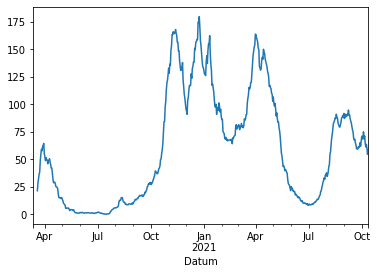

In [5]:
df.Inzidenz7Tage.plot.line()

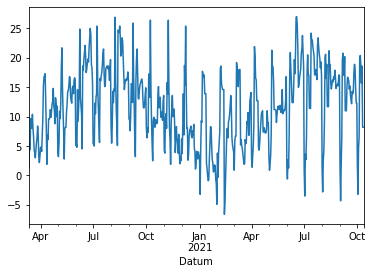

In [6]:
df["Temperatur"] = pd.to_numeric(df.TemperaturFinkenwerder).fillna(method="ffill")
# df["Temperatur"] = df["Temperatur"].rolling(10)
df.Temperatur.plot.line()

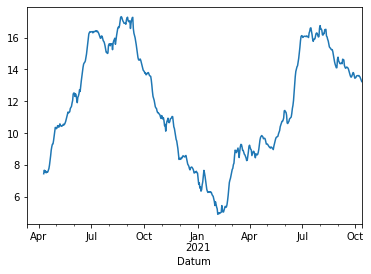

In [7]:
df["Temperatur"].rolling(30).mean().plot.line()

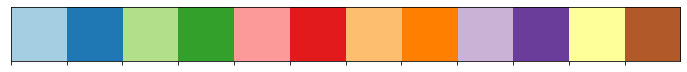

In [15]:
# Save a palette to a variable:
palette = sns.color_palette("Paired")
 
# Use palplot and pass in the variable:
sns.palplot(palette)

In [12]:
df["TemperaturMittel"] = df.Temperatur.rolling(30).mean()

AxesSubplot(0.125,0.125;0.775x0.755)


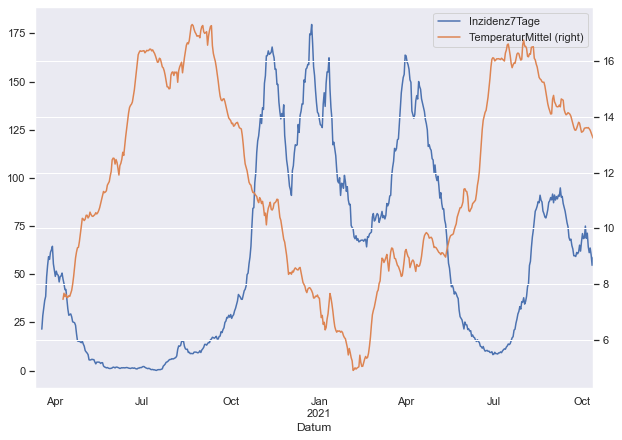

In [17]:
sns.set()
ax = df[["Inzidenz7Tage", "TemperaturMittel"]].plot.line(
    figsize=(10,7), 
    secondary_y="TemperaturMittel",
#     color=sns.color_palette("Paired")
)
print(ax)
# ax.set_xlabel('Datum')
# ax.set_ylabel('7 Tage Inzidenz (pro 100k Einwohner)', color='b')
# ax.set_ylabel('Y2 data', color='b')

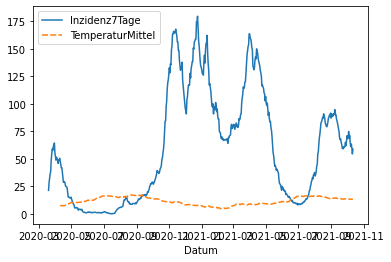

In [10]:
sns.lineplot(data=df[["Inzidenz7Tage", "TemperaturMittel"]])